In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import os
os.chdir('../')

In [2]:
def get_offset_task(train_shape, offset):
    new_task = np.roll(train_shape, offset)
    new_task[0:offset] = 0
    new_task[new_task < 0] = 0
    return new_task

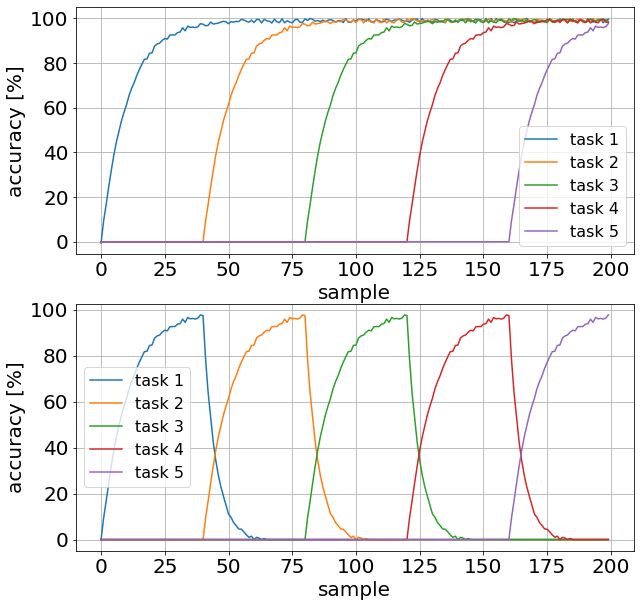

In [9]:
n = 200
x = np.arange(n)

train_shape = -100*np.exp(-0.1*x) + 100 + 2*np.random.random(n) - 2

x_forget = np.arange(-40, 160)
forgetting = 100*np.exp(-0.2*x_forget)-100
forgetting[forgetting > 0] = 0

train_shape_forgetting = train_shape + forgetting
train_shape_forgetting[train_shape_forgetting < 0] = 0

fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].grid()
ax[1].grid()

ax[0].plot(x, train_shape)
ax[1].plot(x, train_shape_forgetting)

for i in range(1, 5):

    train_shape_n = get_offset_task(train_shape, 40*i)
    train_shape_forgetting_n = get_offset_task(train_shape_forgetting, 40*i)


    ax[0].plot(x, train_shape_n)
    ax[1].plot(x, train_shape_forgetting_n)
    
ax[0].set_xlabel('sample')
ax[0].set_ylabel('accuracy [%]')
ax[0].legend(['task 1', 'task 2', 'task 3', 'task 4', 'task 5'], fontsize=16)

ax[1].set_xlabel('sample')
ax[1].set_ylabel('accuracy [%]')
ax[1].legend(['task 1', 'task 2', 'task 3', 'task 4', 'task 5'], fontsize=16)

matplotlib.rcParams.update({'font.size': 20})

filename = "example_training_forgetting"
plt.savefig("images/"+filename+".pdf", format='pdf')